In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def defining_limits(img):
    
    m,n = img.shape
    
    #top
    i = 0
    while i < m:
        row = img[i,:]
        if (row[row==255]).shape[0] > 0:
            top = i
            break
        i = i+1
            
    #bottom 
    i = m-1
    while i >= 0:
        row = img[i,:]
        if (row[row==255]).shape[0] > 0:
            bottom = i
            break
        i = i-1
  
    #right
    i = n-1
    while i >= 0:
        col = img[:,i]
        if (col[col==255]).shape[0] > 0:
            right = i
            break
        i = i-1

    #left
    i = 0
    while i < n:
        col = img[:,i]
        if (col[col==255]).shape[0] > 0:
            left = i
            break
        i = i+1
    
    return top, bottom, right, left


In [3]:
def hit_miss_transform(img, b):
    ind1 = b== 1
    ind2 = b== -1
    
    img_pad = np.zeros([img.shape[0]+2, img.shape[1]+2], dtype=np.uint8)
    img_pad[1:-1,1:-1] = img

    b1 = np.zeros(b.shape, dtype=np.uint8)#foreground
    b2 = np.zeros(b.shape, dtype=np.uint8)#background
    
    b1[ind1] = 1
    b2[ind2] = 1
       
    e1 = cv2.erode(img_pad, b1)
    e2 = cv2.erode(cv2.bitwise_not(img_pad), b2)
    
    c = e1&e2
                   
    return c[1:-1,1:-1]

In [4]:
def converge(img, kernel):
    iterations = 0
    
    x0 = np.copy(img)    
    x1 = hit_miss_transform(x0, kernel)
    x1 = cv2.bitwise_or(x1,x0)

    while np.max(x1-x0) > 0:
        x0 = x1
        x1 = hit_miss_transform(x0, kernel)
        x1 = cv2.bitwise_or(x1,x0)
        x1 = x1.astype(np.uint8)
        iterations = iterations+1
    
    print ("iter:", iterations)
    return x1

In [5]:
def convex_hull(img):
    #-1:background, 0:don't care, 1:foreground
    kernel_1 = np.array(([1, 0, 0], 
                         [1, -1,0], 
                         [1, 0, 0]), dtype="int")
    
    kernel_2 = np.array(([1, 1, 1], 
                         [0, -1,0], 
                         [0, 0, 0]), dtype="int")
    
    kernel_3 = np.array(([0, 0, 1], 
                         [0, -1,1], 
                         [0, 0, 1]), dtype="int")
    
    kernel_4 = np.array(([0, 0, 0], 
                         [0, -1,0], 
                         [1, 1, 1]), dtype="int")
    
    d1 = converge(img, kernel_1)
    d2 = converge(img, kernel_2)
    d3 = converge(img, kernel_3)
    d4 = converge(img, kernel_4)
    
    d =  cv2.bitwise_or(cv2.bitwise_or(cv2.bitwise_or(d1,d2),d3),d4)
    top, bottom, right, left = defining_limits(img)
    print("Limits")
    print(top, bottom, right, left)
    
    d[0:top,:] = 0
    d[bottom+1:,:] = 0
    d[:,right+1:] = 0
    d[:,0:left] = 0
    
    return d

iter: 170
iter: 170
iter: 169
iter: 169
Limits
138 472 609 273


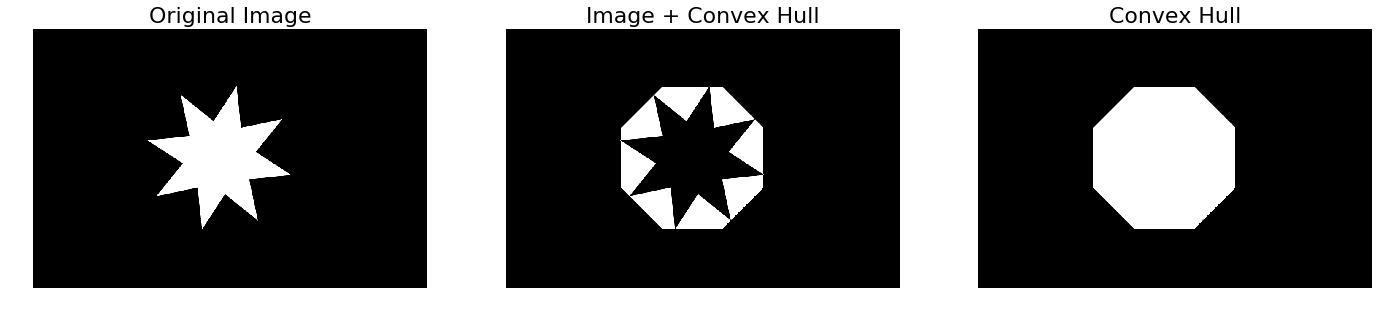

In [6]:
img = cv2.imread("convex_hull1.png",0)
ch = convex_hull(img)

plt.figure(figsize=(24,24))

plt.subplot(1,3,1)
plt.title('Original Image',fontsize=22)
plt.axis("off")
plt.imshow(img,'gray')

plt.subplot(1,3,2)
plt.title('Image + Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch-img,'gray')

plt.subplot(1,3,3)
plt.title('Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch,'gray')
plt.show()

iter: 132
iter: 197
iter: 196
iter: 194
Limits
116 334 564 134


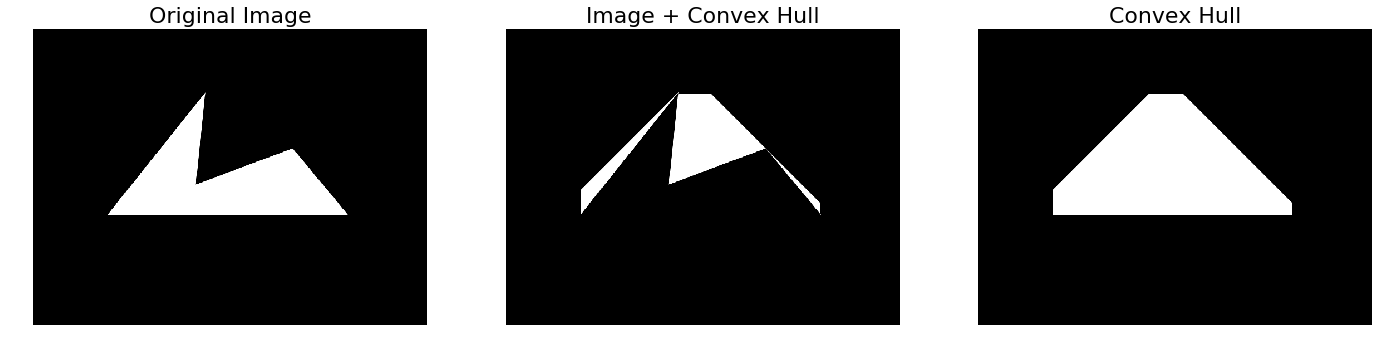

In [7]:
img = cv2.imread("convex_hull2.png",0)
ch = convex_hull(img)

plt.figure(figsize=(24,24))

plt.subplot(1,3,1)
plt.title('Original Image',fontsize=22)
plt.axis("off")
plt.imshow(img,'gray')

plt.subplot(1,3,2)
plt.title('Image + Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch-img,'gray')

plt.subplot(1,3,3)
plt.title('Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch,'gray')
plt.show()

iter: 230
iter: 243
iter: 197
iter: 82
Limits
77 437 533 244


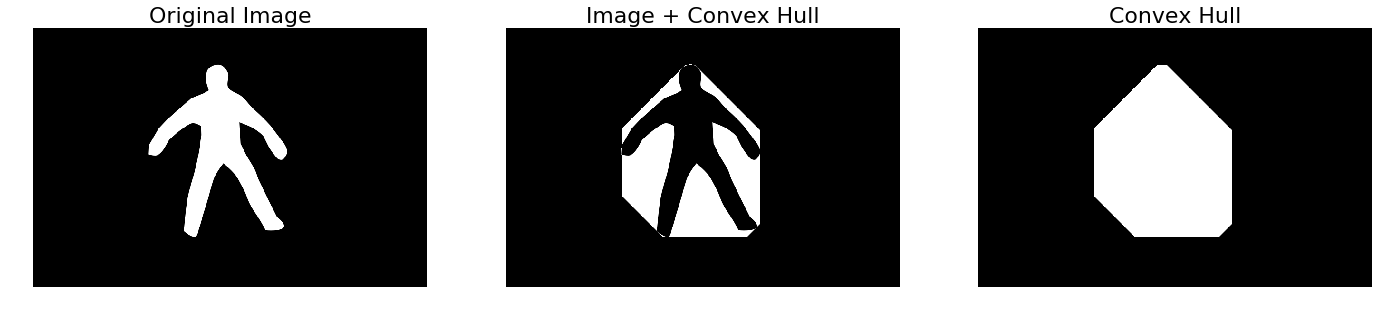

In [8]:
img = cv2.imread("convex_hull3.png",0)
ch = convex_hull(img)

plt.figure(figsize=(24,24))

plt.subplot(1,3,1)
plt.title('Original Image',fontsize=22)
plt.axis("off")
plt.imshow(img,'gray')

plt.subplot(1,3,2)
plt.title('Image + Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch-img,'gray')

plt.subplot(1,3,3)
plt.title('Convex Hull',fontsize=22)
plt.axis("off")
plt.imshow(ch,'gray')
plt.show()